In [12]:
from typing import TypedDict, Literal, NotRequired
from langgraph.graph import StateGraph, START, END

In [13]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    equation: NotRequired[str]
    discriminant: NotRequired[float]
    result: NotRequired[str]

In [ ]:
def show_equation(state: QuadState):
    # Proper equation formatting
    a, b, c = state["a"], state["b"], state["c"]
    equation = f"{a}x² {'+' if b>=0 else ''}{b}x {'+' if c>=0 else ''}{c}"
    return {"equation": equation}


In [14]:

def calculate_discriminant(state: QuadState):
    a, b, c = state["a"], state["b"], state["c"]
    D = b**2 - 4*a*c
    return {"discriminant": D}

In [19]:
def real_roots(state: QuadState):
    root1=(-state["b"]+state["discriminant"]**0.5)/(2*state["a"])
    root2=(-state["b"]-state["discriminant"]**0.5)/(2*state["a"])
    
    results=f'The roots are {root1} and {root2}'
    
    return {'result':results}

In [20]:
def repeated_roots(state: QuadState):
    root=(-state["b"])/(2*state["a"])
    results=f'only repeating root is  {root} '
    
    return {'result':results}

In [23]:
def no_real_roots(state: QuadState):
    results=f'no real roots'
    
    return {'result':results}

In [24]:
def check_condition(state:QuadState)->Literal["real_roots","repeated_roots","no_real_roots"]:
    
    if state["discriminant"]>0:
        return "real_roots"
    elif state["discriminant"]==0:
        return "repeated_roots"
    else:
        return "no_real_roots"  
    

In [ ]:
graph = StateGraph(QuadState)

graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)



graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant",check_condition)
graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("no_real_roots", END)


workflow = graph.compile()

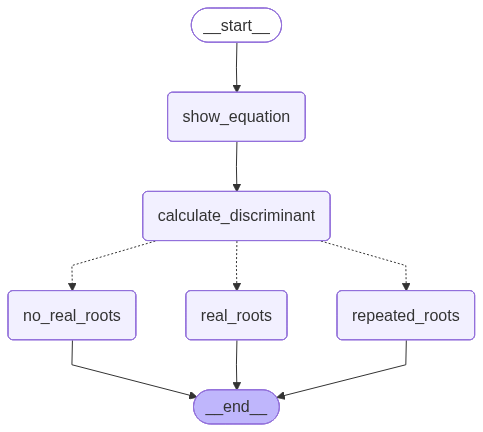

In [26]:
workflow

In [27]:
initial_state = {
    "a": 4,
    "b": -5,
    "c": -4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x2-5x-4',
 'discriminant': 89,
 'result': 'The roots are 1.8042476415070754 and -0.5542476415070754'}